In [4]:
from pileup_correction import *
from fit_util import *

In [18]:
#f = r.TFile("./data/results_10MissingOutputFiles_9day_histOnly.root")
f = r.TFile("../truncationTest/data/results_1MissingFile_FullVsTrunc.root")
f.ls()

TFile**		../truncationTest/data/results_1MissingFile_FullVsTrunc.root	
 TFile*		../truncationTest/data/results_1MissingFile_FullVsTrunc.root	
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	farlineTrunc;1	farlineTrunc (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	clusterCompare;1	clusterCompare (ReconComparisonTruncatedVsFull) folder


In [19]:
clusters = f.Get("clustersAndCoincidences").Get("clusters").Clone("clusters")

In [20]:
fileString = "_pileupRebinTest"
print("Creating files with:", fileString, "suffix")

Creating files with: _pileupRebinTest suffix


In [21]:
Ninitial = clusters.Project3D("yx").Clone()
Ninitial.Rebin2D(10,10)

<ROOT.TH2D object ("clusters_yx") at 0x7ffff97afe70>

In [22]:
corrector = PileupCorrector(Ninitial, "Test", 0, 2)

In [23]:
corrector.fitOptions = "REMB"
corrector.FullChain()

Running full pileup correction on input histogram.
Computing rho_double histogram
All done
Computing double pileup correction
Starting triple correction
Correction completed! Final histogram stored in h_pileupCorrected
 FCN=1.01697e+07 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          50 TOTAL
                     EDM=3.18744e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.95033e-11   1.04712e-14   1.04712e-14  -2.41122e+08
 FCN=61824.8 FROM MINOS     STATUS=SUCCESSFUL      8 CALLS         152 TOTAL
                     EDM=5.43057e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -4.65782e-11   4.10163e-14  -0.00000e+00   2.17164e+07
   2  p1          -3.21443e-2

In [31]:
DumpClass(corrector)

Dumping:  <pileup_correction.PileupCorrector object at 0x7f92e50bd390>
Class:  <class 'pileup_correction.PileupCorrector'>
    h = <ROOT.TH2D object ("N_initial_0_Test") at 0x7ffffb0d2e60>
    h_y = <ROOT.TH1D object ("h_y") at 0x7ffffb0cb560>
    name = Test
    iteration = 0
    deltat = 2
    verbosity = 0
    rhoDouble = <ROOT.TH2D object ("h_rhoDouble_0_Test") at 0x7ffffb035a20>
    fitOptions = REMB
    doublePileup = <ROOT.TH2D object ("DoublePileup_0_Test") at 0x7ffffb197960>
    doublePileupY = <ROOT.TH1D object ("doublePileupY") at 0x7ffffb1f0fe0>
    doublePileupOnlyScaleFactor = 7.950327816410492e-11
    h_doublePileupCorrected = <ROOT.TH2D object ("h_doublePileupCorrected") at 0x7ffffb3f6bc0>
    triplePileup = <ROOT.TH2D object ("triplePileup") at 0x7ffffb41a6a0>
    triplePileupY = <ROOT.TH1D object ("triplePileupY") at 0x7ffffb3f7140>
    pileupScaleFactors = [-4.657816425645592e-11, -3.214427728528118e-20]
    h_pileupCorrected = <ROOT.TH2D object ("h_pileupCorrected")

In [32]:
import pickle

In [33]:
pickle.dump(corrector, open("corrector.pickle","wb"))

In [1]:
import pickle

In [2]:
c1 = pickle.load(open("corrector.pickle","rb"))

Welcome to JupyROOT 6.12/06


In [5]:
vars(c1)

{'h': <ROOT.TH2D object ("N_initial_0_Test") at 0x7fffd1c8e610>,
 'h_y': <ROOT.TH1D object ("h_y") at 0x7fffd1e67840>,
 'name': 'Test',
 'iteration': 0,
 'deltat': 2,
 'verbosity': 0,
 'rhoDouble': <ROOT.TH2D object ("h_rhoDouble_0_Test") at 0x7fffd1f09a70>,
 'fitOptions': 'REMB',
 'doublePileup': <ROOT.TH2D object ("DoublePileup_0_Test") at 0x7fffd1f09e80>,
 'doublePileupY': <ROOT.TH1D object ("doublePileupY") at 0x7fffd1f13da0>,
 'doublePileupOnlyScaleFactor': 7.950327816410492e-11,
 'h_doublePileupCorrected': <ROOT.TH2D object ("h_doublePileupCorrected") at 0x7fffd1edfb30>,
 'triplePileup': <ROOT.TH2D object ("triplePileup") at 0x7fffcfb10350>,
 'triplePileupY': <ROOT.TH1D object ("triplePileupY") at 0x7fffcfb10760>,
 'pileupScaleFactors': [-4.657816425645592e-11, -3.214427728528118e-20],
 'h_pileupCorrected': <ROOT.TH2D object ("h_pileupCorrected") at 0x7fffcfb10d40>}

In [8]:
import ROOT as r

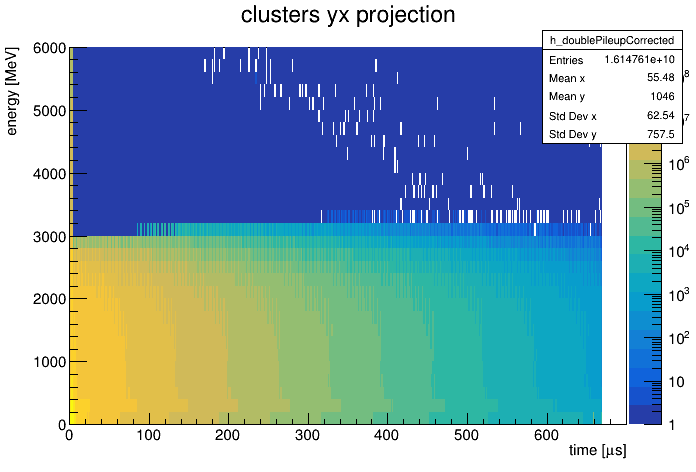

In [11]:
c = r.TCanvas()
c1.h_doublePileupCorrected.Draw("colz")
c.SetLogz()
c.Draw()